In [1]:
data <- read.table("gauge.txt", header=TRUE)
head(data)

density,gain
0.686,17.6
0.686,17.3
0.686,16.9
0.686,16.2
0.686,17.1
0.686,18.5


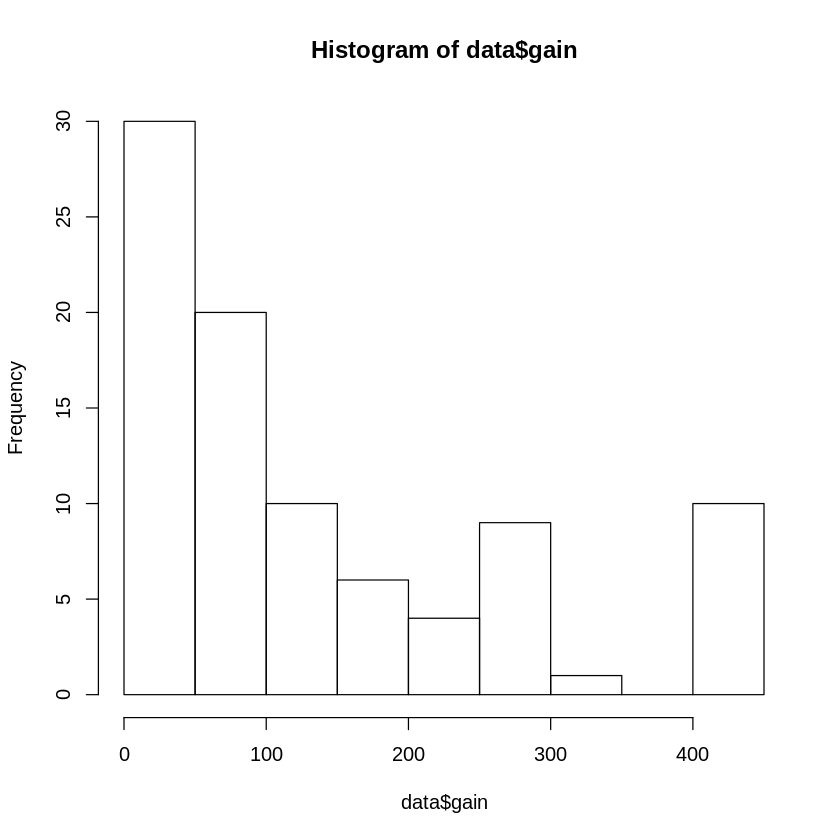

In [2]:
#gain histogram
hist(data$gain)

In [3]:
# fitting without transformation
fit <- lm(formula=density~gain, data=data)
summary(fit)


Call:
lm(formula = density ~ gain, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13198 -0.09452 -0.01354  0.09682  0.16495 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.5497239  0.0151243   36.35   <2e-16 ***
gain        -0.0015334  0.0000777  -19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09769 on 88 degrees of freedom
Multiple R-squared:  0.8157,	Adjusted R-squared:  0.8136 
F-statistic: 389.5 on 1 and 88 DF,  p-value: < 2.2e-16


In [4]:
# set up the predictied and residuals variables
copy <- data.frame(data)
predicted <- predict(fit)
residuals <- residuals(fit)

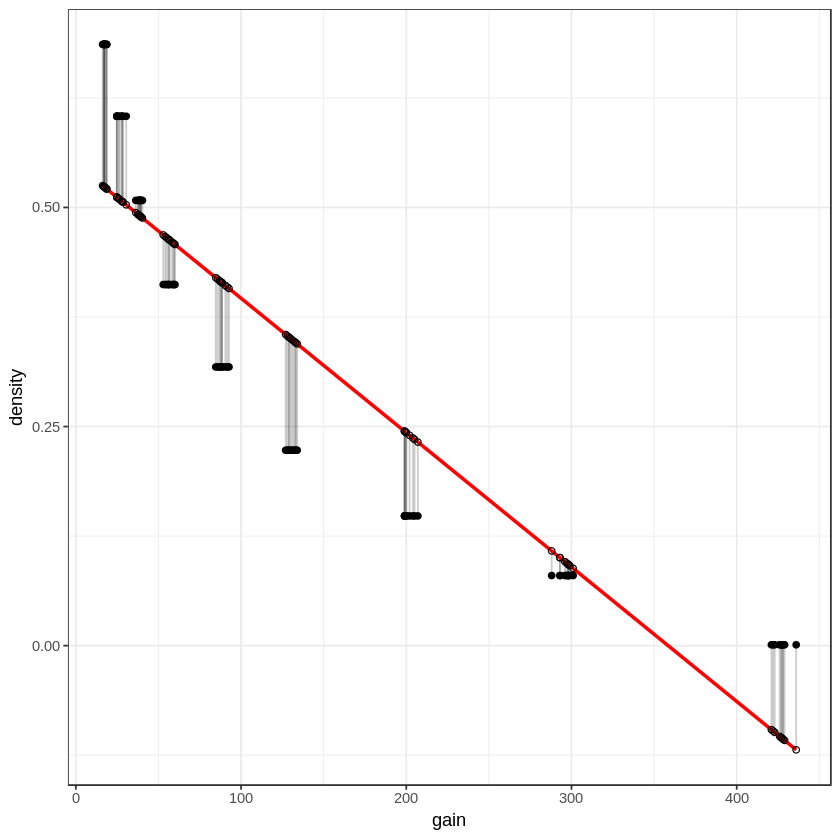

In [5]:
# ggplot to show residual distance and regression line
library(ggplot2)
(ggplot(data, aes(x = gain, y = density))+geom_smooth(method = "lm", se = FALSE, color = "red")+
 geom_segment(aes(xend = gain, yend = predicted), alpha = .2)+geom_point()+geom_point(aes(y = predicted), shape = 1)
 +theme_bw())

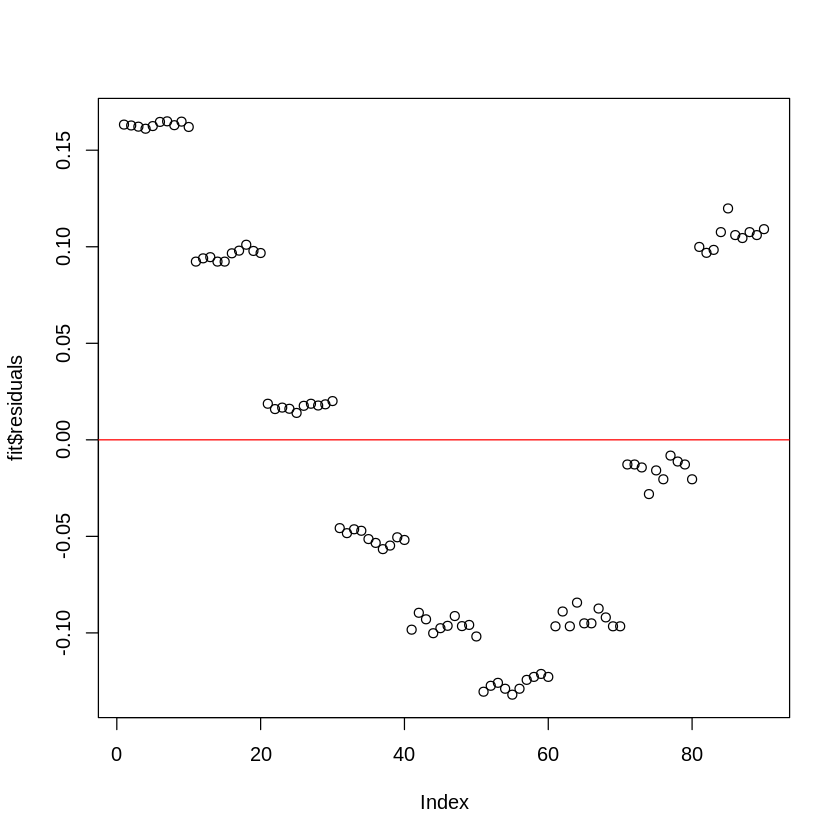

In [30]:
plot(fit$residuals)
abline(0, 0, col="red")

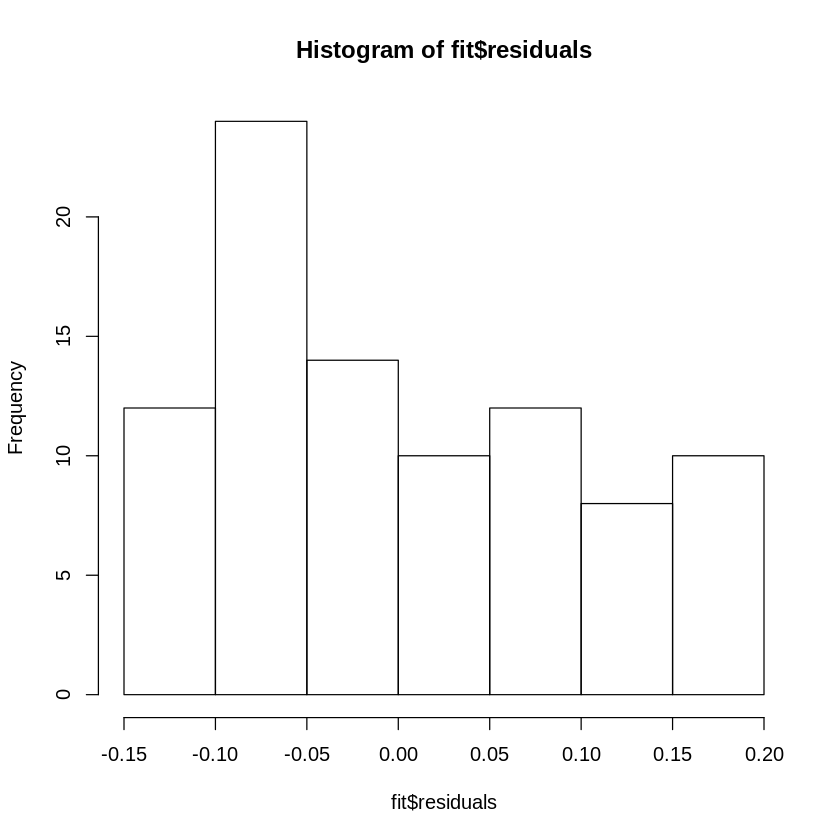

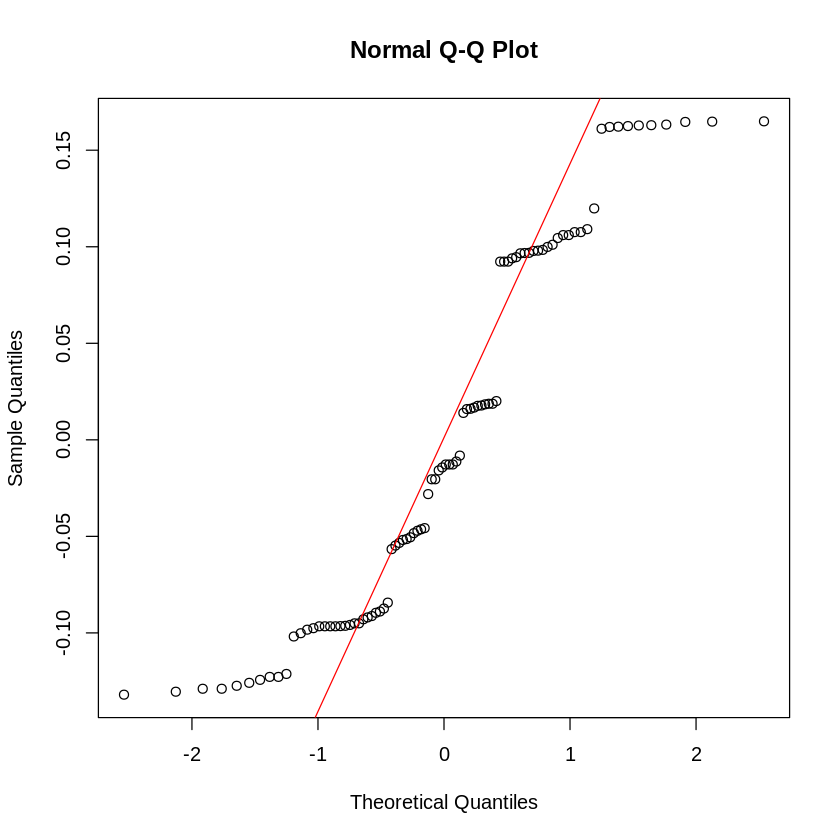

In [31]:
hist(fit$residuals)
qqnorm(fit$residuals)
qqline(fit$residuals, col="red")

When we see the data through the histogram, we can observe that our data is highly skewed to the left side. Thus, we apply the logarithm to our gain data to make less skewed data

In [33]:
log_df = data.frame(data)
logarithmic <- function(x) {
return (log(x,base=exp(1)))
}
log_df$gain <- logarithmic(log_df$gain)
head(log_df)

density,gain
<dbl>,<dbl>
0.686,2.867899
0.686,2.850707
0.686,2.827314
0.686,2.785011
0.686,2.839078
0.686,2.917771


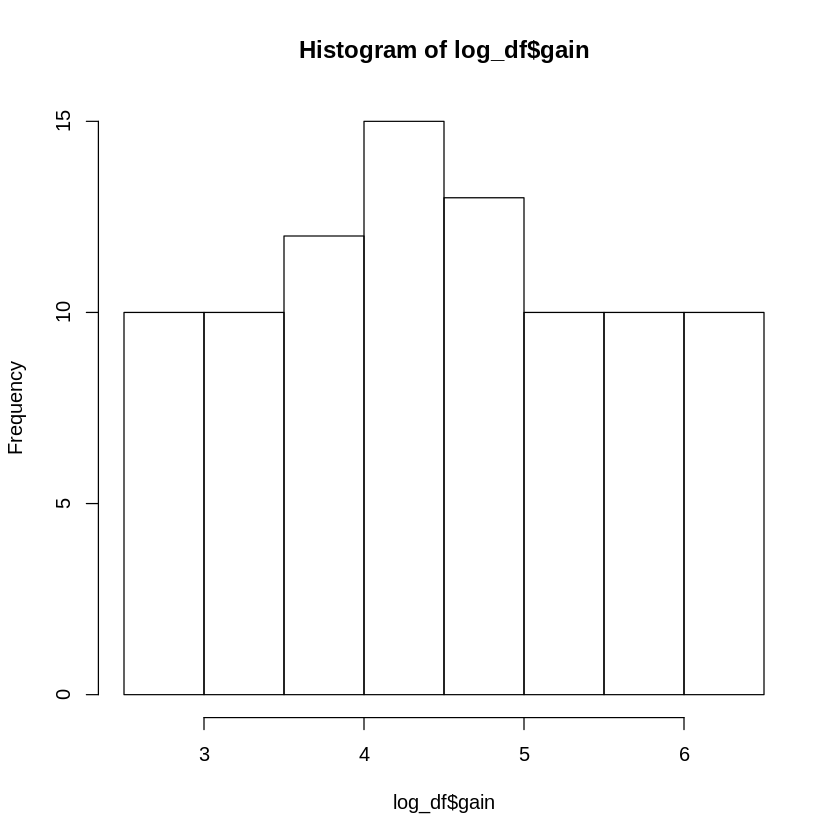

In [34]:
# we can observed the data is less skewed
hist(log_df$gain)

In [35]:
#fit data and setup predicted and residuals
log_fit <- lm(formula=density~gain, data=log_df)
predicted <- predict(log_fit)
residuals <- residuals(log_fit)
summary(log_fit)


Call:
lm(formula = density ~ gain, data = log_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028031 -0.011079 -0.000018  0.011595  0.044911 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.298013   0.006857   189.3   <2e-16 ***
gain        -0.216203   0.001494  -144.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01471 on 88 degrees of freedom
Multiple R-squared:  0.9958,	Adjusted R-squared:  0.9958 
F-statistic: 2.096e+04 on 1 and 88 DF,  p-value: < 2.2e-16


In [36]:
rmse = function(pred, act){
  sqrt(mean((pred - act)^2))
}
rmse(predicted,log_df$gain)

[1] 4.329427

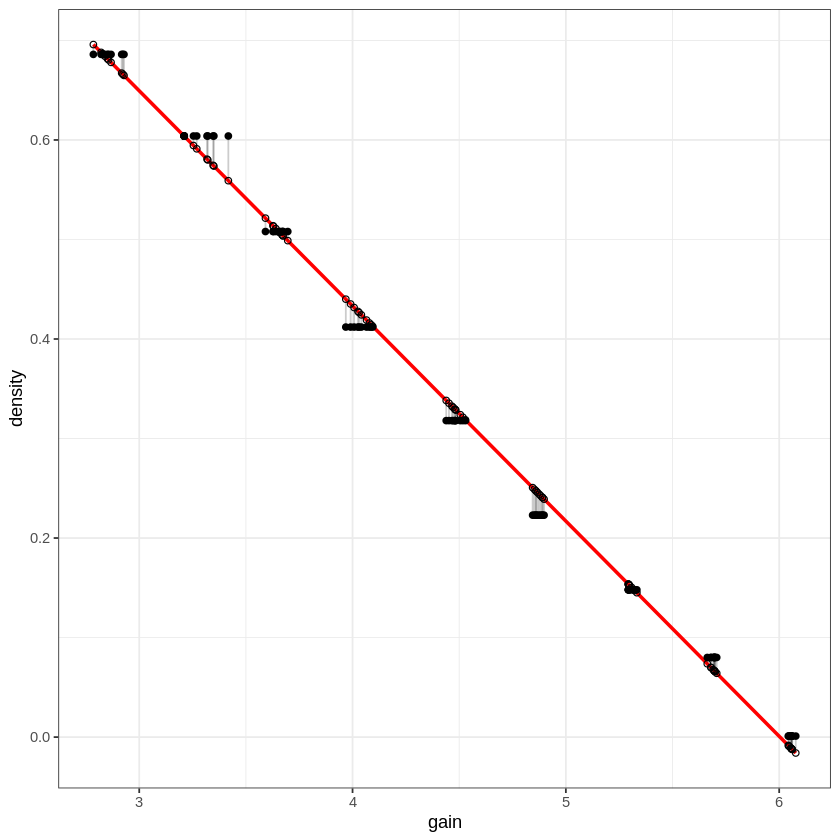

In [38]:
library(ggplot2)
(ggplot(log_df, aes(x = gain, y = density))+geom_smooth(method = "lm", se = FALSE, color = "red")+
 geom_segment(aes(xend = gain, yend = predicted), alpha = .2)+geom_point()+geom_point(aes(y = predicted), shape = 1)
 +theme_bw())

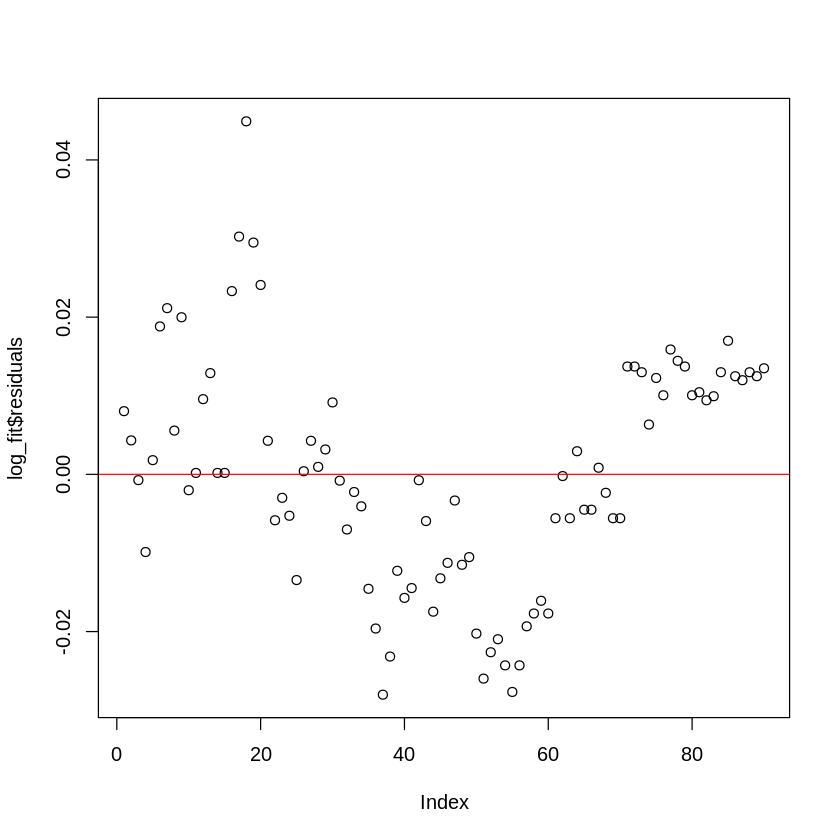

In [39]:
plot(log_fit$residuals)
abline(0, 0, col="red")

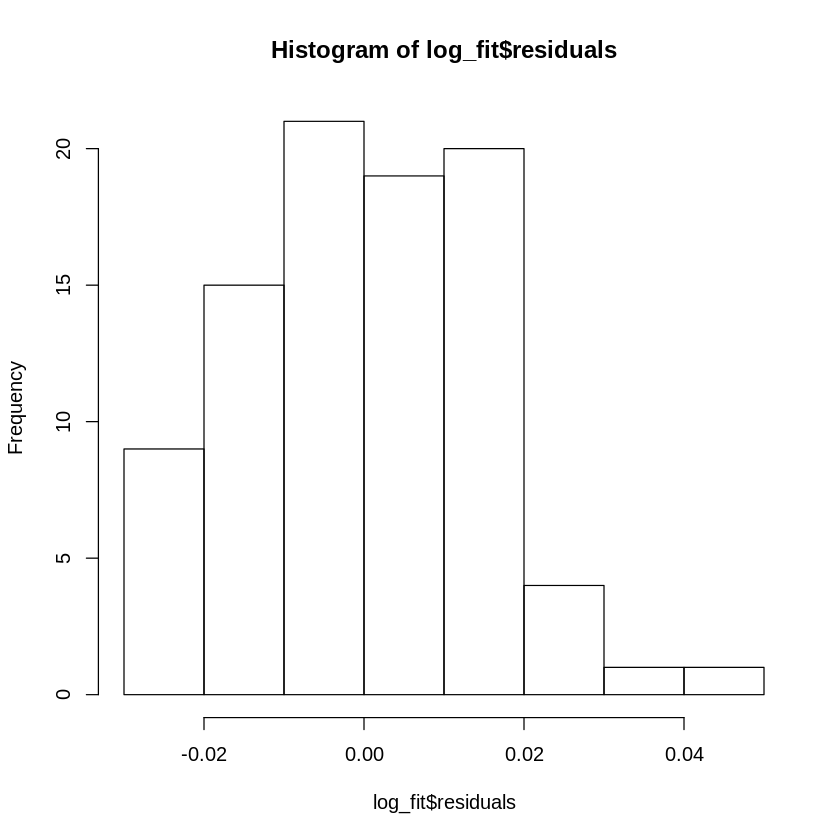

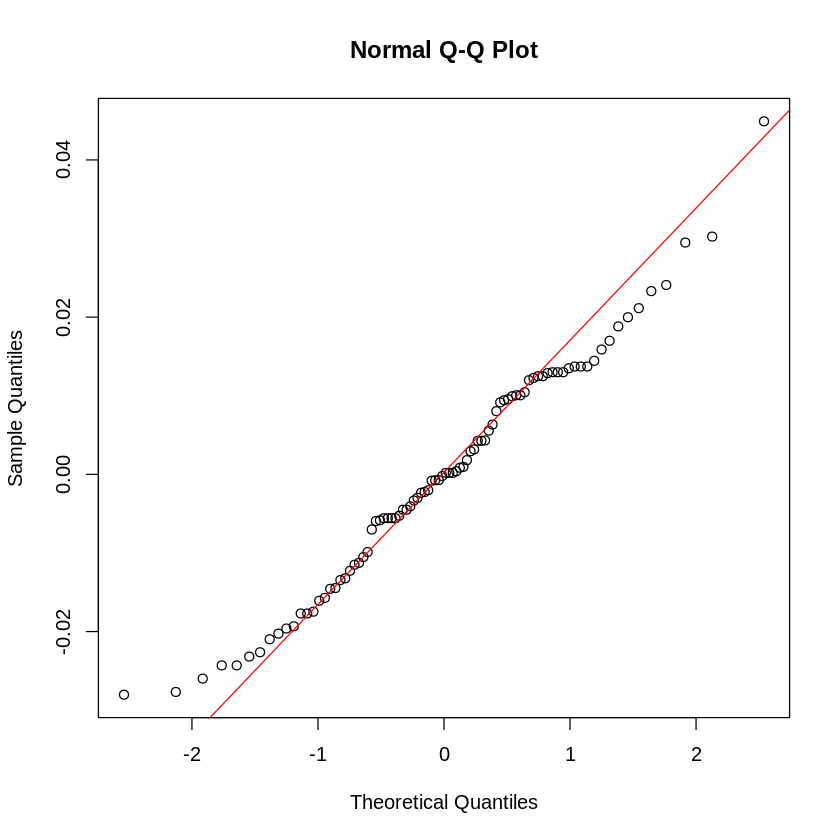

In [40]:
# residual be more normalized than before
hist(log_fit$residuals)
qqnorm(log_fit$residuals)
qqline(log_fit$residuals, col="red")

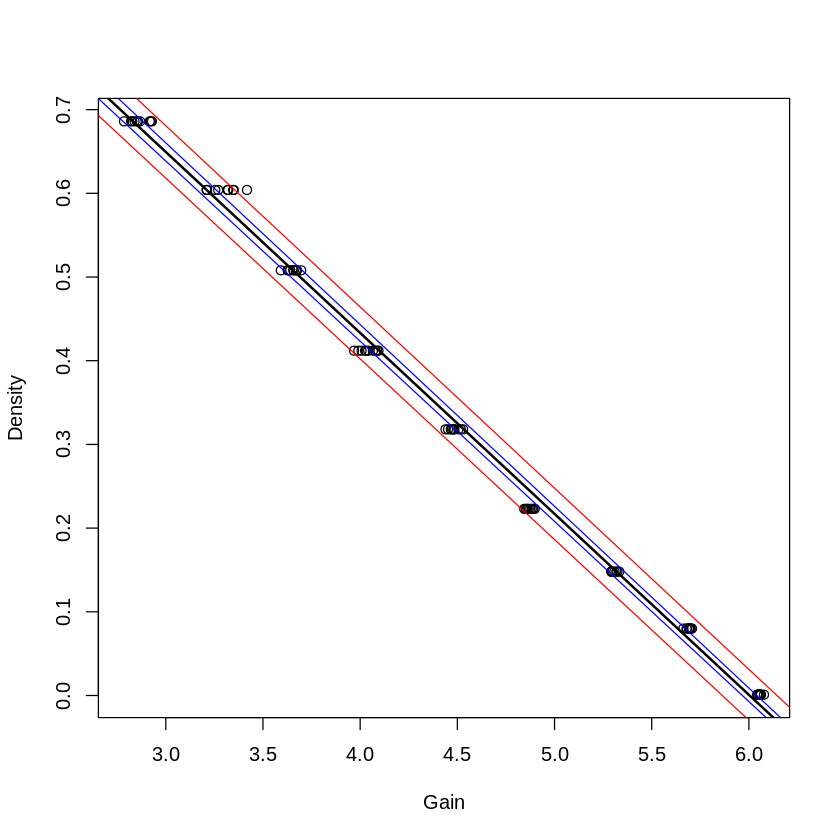

In [51]:
Density= log_df$density
Gain = log_df$gain
new_fit <- lm(Density ~ Gain)
pts <- seq(0, 600, length.out=90)
CI.conf <- predict(new_fit, data.frame(Gain = pts), interval = "confidence") #confidence interval
CI.pred <- predict(new_fit, data.frame(Gain = pts), interval = "predict") #prediction interval
plot(Gain, Density)
lines(pts, CI.conf[,"fit"], col="black", lwd=2)
lines(pts, CI.conf[,"lwr"], col="blue", lwd=1) 
lines(pts, CI.conf[,"upr"], col="blue", lwd=1)
lines(pts, CI.pred[,"lwr"], col="red", lwd=1)
lines(pts, CI.pred[,"upr"], col="red", lwd=1)

In [52]:
summary(fit)$r.squared
summary(log_fit)$r.squared

[1] 0.8156974

[1] 0.9958183

In [17]:
library(randomForest)
df_bag = randomForest(gain~density, data = log_df)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [54]:
predicted <- predict(df_bag)
residuals <- residuals(df_bag)

In [57]:
1- (sum((Density-predicted)^2)/sum((Density-mean(Density))^2))

[1] -369.195

In [45]:
rmse = function(pred, act){
  sqrt(mean((pred - act)^2))
}
rmse(predicted,log_df$gain)

[1] 0.03797012